<a href="https://colab.research.google.com/github/zhaocaiQ/machine_learning_study/blob/master/8_2_%ED%95%A9%EC%84%B1%EA%B3%B1%EC%8B%A0%EA%B2%BD%EB%A7%9D_%EC%9D%B4%EB%AF%B8%EC%A7%80%EB%B6%84%EB%A5%98_%EB%B3%B5%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = \
    keras.datasets.fashion_mnist.load_data()

train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [29]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))

In [30]:
model.add(keras.layers.MaxPool2D(2))

In [31]:
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.MaxPool2D(2))

In [32]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [33]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0         
                                                                 
 dense_2 (Dense)             (None, 100)              

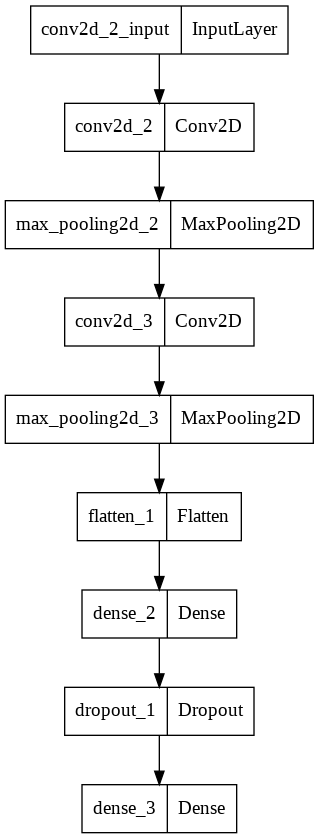

In [34]:
keras.utils.plot_model(model)

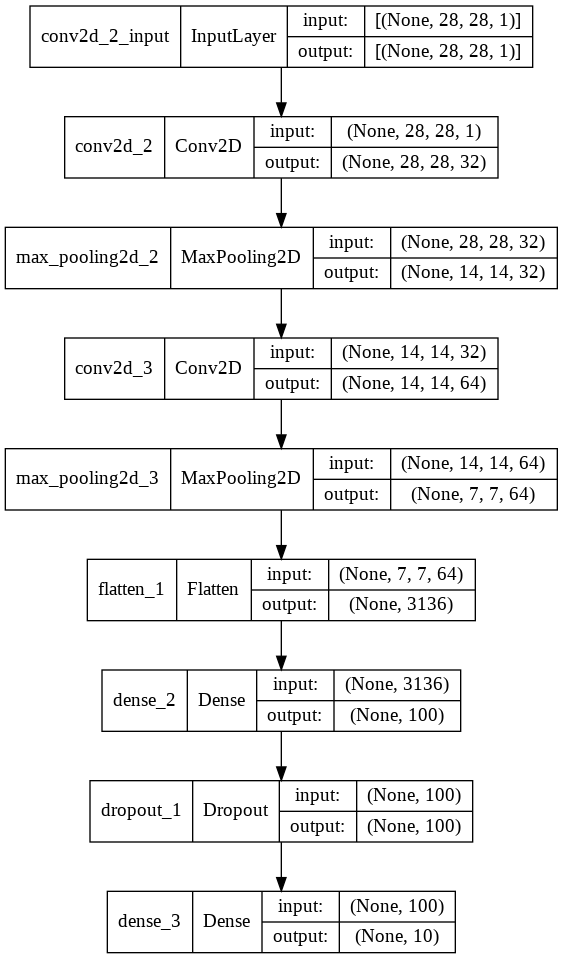

In [35]:
keras.utils.plot_model(model, show_shapes=True)

In [36]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 64s 43ms/step - loss: 0.5101 - accuracy: 0.8176 - val_loss: 0.3327 - val_accuracy: 0.8751
Epoch 2/20
1500/1500 [==============================] - 65s 44ms/step - loss: 0.3379 - accuracy: 0.8771 - val_loss: 0.2737 - val_accuracy: 0.9002
Epoch 3/20
1500/1500 [==============================] - 65s 43ms/step - loss: 0.2878 - accuracy: 0.8956 - val_loss: 0.3012 - val_accuracy: 0.8906
Epoch 4/20
1500/1500 [==============================] - 65s 43ms/step - loss: 0.2606 - accuracy: 0.9056 - val_loss: 0.2380 - val_accuracy: 0.9116
Epoch 5/20
1500/1500 [==============================] - 64s 43ms/step - loss: 0.2331 - accuracy: 0.9140 - val_loss: 0.2419 - val_accuracy: 0.9139
Epoch 6/20
1500/1500 [==============================] - 64s 43ms/step - loss: 0.2124 - accuracy: 0.9214 - val_loss: 0.2374 - val_accuracy: 0.9132
Epoch 7/20
1500/1500 [==============================] - 64s 43ms/step - loss: 0.1974 - accuracy: 0.9273 - val_loss: 0.2293 -

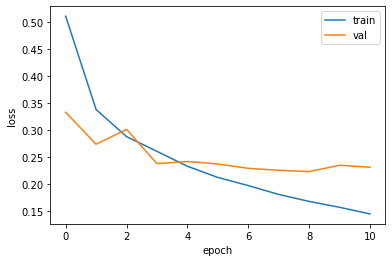

In [37]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [38]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 5s 12ms/step - loss: 0.2232 - accuracy: 0.9220


[0.22324664890766144, 0.921999990940094]

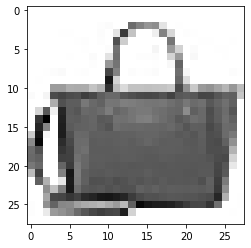

In [39]:
plt.imshow(val_scaled[0].reshape(28, 28), cmap='gray_r')
plt.show()

In [40]:
preds = model.predict(val_scaled[0:1])
print(preds)

[[1.6163540e-19 8.8314667e-24 2.1955446e-23 2.1809336e-18 2.9240266e-19
  1.1581576e-17 2.2023004e-20 1.8621853e-21 1.0000000e+00 3.3774162e-20]]


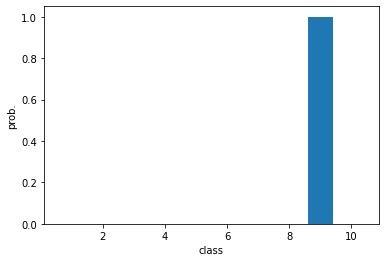

In [41]:
plt.bar(range(1,11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [42]:
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트',
           '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']

In [43]:
import numpy as np
print(classes[np.argmax(preds)])

가방


In [44]:
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0

In [45]:
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 4s 13ms/step - loss: 0.2532 - accuracy: 0.9141


[0.2532166540622711, 0.9140999913215637]